# Lead Score Case Study by Ishita Gupta

To identify the possible leads based on existing data. 

#importing important libraries:

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Importing all datasets
raw_df = pd.read_csv('C:/Users/A119248709/OneDrive - Deutsche Telekom AG/Ishita\'s Documents/Data Analytics/Lead+Scoring+Case+Study/Lead Scoring Assignment/Leads.csv')
raw_df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

## Inspecting the Dataframe

In [3]:
# Let's check the dimensions of the dataframe
raw_df.shape

(9240, 37)

In [4]:
# let's look at the statistical aspects of the dataframe
raw_df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Data Preparation

#### Converting some binary variables (Yes/No) to 0/1

In [6]:
#copying raw_df to working_df
working_df = raw_df.copy()
working_df.head(2)

Prospect ID  Lead Number Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737         API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728         API   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   

  Get updates on DM Content Lead Profile    City Asymmetrique Activity Index  \
0                        No       Select  Select                   02.Medium   
1                        No       Select  Select                   02.Medium   

  Asymmetrique Profile Index Asymmetrique Activity Score  \
0                  02.Medium                        15.0   
1                  02.Medium                        15.0   

  Asymmetrique Profile Score I agree to pay the amount through cheque  \
0                       15.0                                       No   
1                       15.0                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  

[2 rows x 37 columns]

In [7]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview','Update me on Supply Chain Content','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
working_df[varlist] = working_df[varlist].apply(binary_map)

In [8]:
working_df.head(2)

Prospect ID  Lead Number Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737         API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728         API   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   

  Get updates on DM Content Lead Profile    City Asymmetrique Activity Index  \
0                         0       Select  Select                   02.Medium   
1                         0       Select  Select                   02.Medium   

  Asymmetrique Profile Index Asymmetrique Activity Score  \
0                  02.Medium                        15.0   
1                  02.Medium                        15.0   

   Asymmetrique Profile Score  I agree to pay the amount through cheque  \
0                        15.0                                         0   
1                        15.0                                         0   

   A free copy of Mastering The Interview  Last Notable Activity  
0                                       0               Modified  
1                                       0           Email Opened  

[2 rows x 37 columns]

In [9]:
working_df.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [10]:
# Drop the columns with more than 50% null values
working_df.drop(['Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index','Tags'],axis=1,inplace=True)

In [11]:
working_df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Digital Advertisement Through Recommendations  \
0                     0                       0   
1                     0                       0   
2                     0                       0   
3                     0                       0   
4                     0                       0   

  Receive More Updates About Our Courses Update me on Supply Chain Content  \
0                                      0                                 0   
1                                      0                                 0   
2                                      0                                 0   
3                                      0                                 0   
4                                      0                                 0   

  Get updates on DM Content    Lead Profile    City  \
0                         0          Select  Select   
1                         0          Select  Select   
2                         0  Potential Lead  Mumbai   
3                         0          Select  Mumbai   
4                         0          Select  Mumbai   

   I agree to pay the amount through cheque  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   A free copy of Mastering The Interview  Last Notable Activity  
0                                       0               Modified  
1                                       0           Email Opened  
2                                       1           Email Opened  
3                                       0               Modified  
4                                       0               Modified  

[5 rows x 31 columns]

In [12]:
# delete the rows with less number of missing values: 
working_df = working_df.dropna(subset=['Lead Source', 'Last Activity','TotalVisits','Page Views Per Visit'])

In [13]:
#checking shape of df
working_df.shape

(9074, 31)

In [14]:
#Analysing remaining columns with missing values: 
working_df['Lead Profile'].unique()

array(['Select', 'Potential Lead', nan, 'Other Leads',
       'Dual Specialization Student', 'Student of SomeSchool',
       'Lateral Student'], dtype=object)

In [15]:
working_df['Lead Profile'].value_counts()

Lead Profile
Select                         4055
Potential Lead                 1554
Other Leads                     482
Student of SomeSchool           240
Lateral Student                  21
Dual Specialization Student      20
Name: count, dtype: int64

In [16]:
# Here, values Select and nan means the same, hence dropping the column
working_df.drop('Lead Profile',inplace=True,axis=1)

In [17]:
working_df['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6370
Flexibility & Convenience       1
Other                           1
Name: count, dtype: int64

In [18]:
# as there is nothing much to categorise, this column can be dropeed: 
working_df.drop('What matters most to you in choosing a course',inplace=True,axis=1)

In [19]:
working_df['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5476
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: count, dtype: int64

In [20]:
#As majority are unemployed, this is as good as nan, hence dropping:
working_df.drop('What is your current occupation',axis=1,inplace=True)

In [21]:
working_df['Country'].value_counts()

Country
India                   6491
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

In [22]:
#As majority are from India, this is as good as nan, hence dropping:
working_df.drop('Country',axis=1,inplace=True)

In [23]:
# Rechecking the status:
working_df.isnull().sum().sort_values(ascending=False)

How did you hear about X Education          2200
Specialization                              1431
City                                        1419
Prospect ID                                    0
Newspaper Article                              0
A free copy of Mastering The Interview         0
I agree to pay the amount through cheque       0
Get updates on DM Content                      0
Update me on Supply Chain Content              0
Receive More Updates About Our Courses         0
Through Recommendations                        0
Digital Advertisement                          0
Newspaper                                      0
X Education Forums                             0
Search                                         0
Magazine                                       0
Lead Number                                    0
Last Activity                                  0
Page Views Per Visit                           0
Total Time Spent on Website                    0
TotalVisits         

In [24]:
working_df['How did you hear about X Education'].value_counts()

How did you hear about X Education
Select                   4886
Online Search             808
Word Of Mouth             347
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               66
Email                      26
SMS                        23
Name: count, dtype: int64

In [25]:
#As majority are Select, this is as good as nan, hence dropping:
working_df.drop('How did you hear about X Education',axis=1,inplace=True)

In [26]:
working_df['Converted'].value_counts()

Converted
0    5639
1    3435
Name: count, dtype: int64

In [27]:
working_df['Specialization'].value_counts()

Specialization
Select                               1851
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [28]:
# Here, we see good variety and can get some insights about the relatin between the type of people getting converting to leads.
# Hence, replacing nan by Select
working_df['Specialization'].fillna('Select',inplace=True)

In [29]:
working_df['Specialization'].value_counts()

Specialization
Select                               3282
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [30]:
# dropping Specialization as 35% values are not clear
working_df.drop('Specialization',axis=1,inplace=True)

In [31]:
working_df['City'].value_counts()

City
Mumbai                         3177
Select                         2156
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: count, dtype: int64

In [32]:
working_df['City'].fillna('Select',inplace=True)

In [33]:
working_df['City'].value_counts()

City
Select                         3575
Mumbai                         3177
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: count, dtype: int64

In [34]:
# dropping City as 50% values are not clear
working_df.drop('City',axis=1,inplace=True)

In [35]:
# Rechecking the status:
working_df.isnull().sum().sort_values(ascending=False)

Prospect ID                                 0
Lead Number                                 0
A free copy of Mastering The Interview      0
I agree to pay the amount through cheque    0
Get updates on DM Content                   0
Update me on Supply Chain Content           0
Receive More Updates About Our Courses      0
Through Recommendations                     0
Digital Advertisement                       0
Newspaper                                   0
X Education Forums                          0
Newspaper Article                           0
Magazine                                    0
Search                                      0
Last Activity                               0
Page Views Per Visit                        0
Total Time Spent on Website                 0
TotalVisits                                 0
Converted                                   0
Do Not Call                                 0
Do Not Email                                0
Lead Source                       

Now there are no null values in the working dataframe. 

In [36]:
#Checking if all columns have relevant info or not:
for col in working_df.columns:
    if (col == 'Lead Number') or (col == 'Prospect ID'):
        continue
    else:
        print (working_df[col].value_counts(),'\n')

Lead Origin
Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: count, dtype: int64 

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64 

Do Not Email
0    8358
1     716
Name: count, dtype: int64 

Do Not Call
0    9072
1       2
Name: count, dtype: int64 

Converted
0    5639
1    3435
Name: count, dtype: int64 

TotalVisits
0.0      2161
2.0      1679
3.0      1306
4.0      1120

In [37]:
#Dropping columns with no significant impact: 
working_df.drop(['Do Not Email','Do Not Call','TotalVisits','Page Views Per Visit','Total Time Spent on Website','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis=1,inplace=True)

In [38]:
#Checking if all columns have relevant info or not:
for col in working_df.columns:
    if (col == 'Lead Number') or (col == 'Prospect ID'):
        continue
    else:
        print (working_df[col].value_counts(),'\n')

Lead Origin
Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: count, dtype: int64 

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64 

Converted
0    5639
1    3435
Name: count, dtype: int64 

Last Activity
Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead         

In [39]:
vc =  working_df['Lead Origin'].value_counts()
valid_values = vc[vc >= 100].index
working_df = working_df[working_df['Lead Origin'].isin(valid_values)]
working_df.shape

(9044, 8)

In [40]:
vc =  working_df['Lead Source'].value_counts()
valid_values = vc[vc >= 900].index
working_df = working_df[working_df['Lead Source'].isin(valid_values)]
working_df.shape

(8318, 8)

In [41]:
vc =  working_df['Last Activity'].value_counts()
valid_values = vc[vc >= 100].index
working_df = working_df[working_df['Last Activity'].isin(valid_values)]
working_df.shape

(8143, 8)

In [42]:
vc =  working_df['Last Notable Activity'].value_counts()
valid_values = vc[vc >= 900].index
working_df = working_df[working_df['Last Notable Activity'].isin(valid_values)]
working_df.shape

(7455, 8)

In [43]:
#Checking if all columns have relevant info or not:
for col in working_df.columns:
    if (col == 'Lead Number') or (col == 'Prospect ID'):
        continue
    else:
        print (working_df[col].value_counts(),'\n')

Lead Origin
Landing Page Submission    4374
API                        3078
Lead Add Form                 3
Name: count, dtype: int64 

Lead Source
Google            2604
Direct Traffic    2279
Olark Chat        1528
Organic Search    1044
Name: count, dtype: int64 

Converted
0    4806
1    2649
Name: count, dtype: int64 

Last Activity
Email Opened                 3135
SMS Sent                     2385
Olark Chat Conversation       772
Converted to Lead             418
Page Visited on Website       305
Email Bounced                 250
Form Submitted on Website     109
Email Link Clicked             81
Name: count, dtype: int64 

A free copy of Mastering The Interview
0    4902
1    2553
Name: count, dtype: int64 

Last Notable Activity
Modified        2969
Email Opened    2593
SMS Sent        1893
Name: count, dtype: int64 



In [44]:
vc =  working_df['Lead Origin'].value_counts()
valid_values = vc[vc >= 100].index
working_df = working_df[working_df['Lead Origin'].isin(valid_values)]
working_df.shape

(7452, 8)

In [45]:
vc =  working_df['Last Activity'].value_counts()
valid_values = vc[vc >= 100].index
working_df = working_df[working_df['Last Activity'].isin(valid_values)]
working_df.shape

(7371, 8)

In [46]:
#Checking if all columns have relevant info or not:
for col in working_df.columns:
    if (col == 'Lead Number') or (col == 'Prospect ID'):
        continue
    else:
        print (working_df[col].value_counts(),'\n')

Lead Origin
Landing Page Submission    4337
API                        3034
Name: count, dtype: int64 

Lead Source
Google            2567
Direct Traffic    2266
Olark Chat        1501
Organic Search    1037
Name: count, dtype: int64 

Converted
0    4741
1    2630
Name: count, dtype: int64 

Last Activity
Email Opened                 3133
SMS Sent                     2385
Olark Chat Conversation       772
Converted to Lead             418
Page Visited on Website       304
Email Bounced                 250
Form Submitted on Website     109
Name: count, dtype: int64 

A free copy of Mastering The Interview
0    4833
1    2538
Name: count, dtype: int64 

Last Notable Activity
Modified        2887
Email Opened    2591
SMS Sent        1893
Name: count, dtype: int64 



In [47]:
print(len(working_df.index))
print(len(working_df.index)/9240)

7371
0.7977272727272727


In [48]:
working_df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   
5  2058ef08-2858-443e-a01f-a9237db2f5ce       660680                      API   

      Lead Source  Converted            Last Activity  \
0      Olark Chat          0  Page Visited on Website   
1  Organic Search          0             Email Opened   
2  Direct Traffic          1             Email Opened   
4          Google          1        Converted to Lead   
5      Olark Chat          0  Olark Chat Conversation   

   A free copy of Mastering The Interview Last Notable Activity  
0                                       0              Modified  
1                                       0          Email Opened  
2                                       1          Email Opened  
4                                       0              Modified  
5                                       0              Modified

We still have 80% of data with us to analyse!!

## Data dummification

In [49]:
working_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7371 entries, 0 to 9239
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Prospect ID                             7371 non-null   object
 1   Lead Number                             7371 non-null   int64 
 2   Lead Origin                             7371 non-null   object
 3   Lead Source                             7371 non-null   object
 4   Converted                               7371 non-null   int64 
 5   Last Activity                           7371 non-null   object
 6   A free copy of Mastering The Interview  7371 non-null   int64 
 7   Last Notable Activity                   7371 non-null   object
dtypes: int64(3), object(5)
memory usage: 518.3+ KB


In [50]:
#listing all categorical values:
cat_cols = [col for col in working_df.columns if working_df[col].dtype == 'object']

In [51]:
#removing the index
cat_cols.remove('Prospect ID')

In [52]:
cat_cols

['Lead Origin', 'Lead Source', 'Last Activity', 'Last Notable Activity']

In [53]:
lo = pd.get_dummies(working_df['Lead Origin'], prefix='LO')
# Dropping Lead Origin_API 
lo1=lo.drop(['LO_Landing Page Submission'],axis=1)
#Adding the results to the master dataframe
working_df = pd.concat([working_df,lo1], axis=1)

ls = pd.get_dummies(working_df['Lead Source'], prefix='LS')
# Dropping Lead Source_Organic Search
ls1=ls.drop(['LS_Organic Search'],axis=1)
#Adding the results to the master dataframe
working_df = pd.concat([working_df,ls1], axis=1)

la = pd.get_dummies(working_df['Last Activity'], prefix='LA')
# Dropping Last Activity_Form Submitted on Website Opened 
la1=la.drop(['LA_Form Submitted on Website'],axis=1)
#Adding the results to the master dataframe
working_df = pd.concat([working_df,la1], axis=1)

lna = pd.get_dummies(working_df['Last Notable Activity'], prefix='LNA')
# Dropping LNA_Email Opened                        
lna1=lna.drop(['LNA_Email Opened'],axis=1)
#Adding the results to the master dataframe
working_df = pd.concat([working_df,lna1], axis=1)

In [54]:
working_df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   
5  2058ef08-2858-443e-a01f-a9237db2f5ce       660680                      API   

      Lead Source  Converted            Last Activity  \
0      Olark Chat          0  Page Visited on Website   
1  Organic Search          0             Email Opened   
2  Direct Traffic          1             Email Opened   
4          Google          1        Converted to Lead   
5      Olark Chat          0  Olark Chat Conversation   

   A free copy of Mastering The Interview Last Notable Activity  LO_API  \
0                                       0              Modified    True   
1                                       0          Email Opened    True   
2                                       1          Email Opened   False   
4                                       0              Modified   False   
5                                       0              Modified    True   

   LS_Direct Traffic  LS_Google  LS_Olark Chat  LA_Converted to Lead  \
0              False      False           True                 False   
1              False      False          False                 False   
2               True      False          False                 False   
4              False       True          False                  True   
5              False      False           True                 False   

   LA_Email Bounced  LA_Email Opened  LA_Olark Chat Conversation  \
0             False            False                       False   
1             False             True                       False   
2             False             True                       False   
4             False            False                       False   
5             False            False                        True   

   LA_Page Visited on Website  LA_SMS Sent  LNA_Modified  LNA_SMS Sent  
0                        True        False          True         False  
1                       False        False         False         False  
2                       False        False         False         False  
4                       False        False          True         False  
5                       False        False          True         False

In [55]:
# Dropping the repeated columns:
working_df.drop(cat_cols,axis=1,inplace=True)
working_df.drop('Prospect ID',axis=1,inplace=True)

In [56]:
working_df.columns

Index(['Lead Number', 'Converted', 'A free copy of Mastering The Interview',
       'LO_API', 'LS_Direct Traffic', 'LS_Google', 'LS_Olark Chat',
       'LA_Converted to Lead', 'LA_Email Bounced', 'LA_Email Opened',
       'LA_Olark Chat Conversation', 'LA_Page Visited on Website',
       'LA_SMS Sent', 'LNA_Modified', 'LNA_SMS Sent'],
      dtype='object')

In [57]:
working_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7371 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Lead Number                             7371 non-null   int64
 1   Converted                               7371 non-null   int64
 2   A free copy of Mastering The Interview  7371 non-null   int64
 3   LO_API                                  7371 non-null   bool 
 4   LS_Direct Traffic                       7371 non-null   bool 
 5   LS_Google                               7371 non-null   bool 
 6   LS_Olark Chat                           7371 non-null   bool 
 7   LA_Converted to Lead                    7371 non-null   bool 
 8   LA_Email Bounced                        7371 non-null   bool 
 9   LA_Email Opened                         7371 non-null   bool 
 10  LA_Olark Chat Conversation              7371 non-null   bool 
 11  LA_Page Visited on Web

In [58]:
#removing Lead Number from dataframe, as they wont contribute to the analysis:
working_df.drop(['Lead Number'],axis=1,inplace=True)

In [59]:
working_df.columns

Index(['Converted', 'A free copy of Mastering The Interview', 'LO_API',
       'LS_Direct Traffic', 'LS_Google', 'LS_Olark Chat',
       'LA_Converted to Lead', 'LA_Email Bounced', 'LA_Email Opened',
       'LA_Olark Chat Conversation', 'LA_Page Visited on Website',
       'LA_SMS Sent', 'LNA_Modified', 'LNA_SMS Sent'],
      dtype='object')

In [60]:
working_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7371 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Converted                               7371 non-null   int64
 1   A free copy of Mastering The Interview  7371 non-null   int64
 2   LO_API                                  7371 non-null   bool 
 3   LS_Direct Traffic                       7371 non-null   bool 
 4   LS_Google                               7371 non-null   bool 
 5   LS_Olark Chat                           7371 non-null   bool 
 6   LA_Converted to Lead                    7371 non-null   bool 
 7   LA_Email Bounced                        7371 non-null   bool 
 8   LA_Email Opened                         7371 non-null   bool 
 9   LA_Olark Chat Conversation              7371 non-null   bool 
 10  LA_Page Visited on Website              7371 non-null   bool 
 11  LA_SMS Sent           

In [61]:
#identifying object column
bool_cols = []
for col in working_df.columns: 
    if working_df[col].dtype == 'bool':
        bool_cols.append(col)

In [62]:
# Defining the map function
def binary_map(x):
    return x.map({True: 1, False: 0})

# Applying the function to the housing list
working_df[bool_cols] = working_df[bool_cols].apply(binary_map)

In [63]:
working_df.head()

Converted  A free copy of Mastering The Interview  LO_API  \
0          0                                       0       1   
1          0                                       0       1   
2          1                                       1       0   
4          1                                       0       0   
5          0                                       0       1   

   LS_Direct Traffic  LS_Google  LS_Olark Chat  LA_Converted to Lead  \
0                  0          0              1                     0   
1                  0          0              0                     0   
2                  1          0              0                     0   
4                  0          1              0                     1   
5                  0          0              1                     0   

   LA_Email Bounced  LA_Email Opened  LA_Olark Chat Conversation  \
0                 0                0                           0   
1                 0                1                           0   
2                 0                1                           0   
4                 0                0                           0   
5                 0                0                           1   

   LA_Page Visited on Website  LA_SMS Sent  LNA_Modified  LNA_SMS Sent  
0                           1            0             1             0  
1                           0            0             0             0  
2                           0            0             0             0  
4                           0            0             1             0  
5                           0            0             1             0

In [64]:
working_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7371 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Converted                               7371 non-null   int64
 1   A free copy of Mastering The Interview  7371 non-null   int64
 2   LO_API                                  7371 non-null   int64
 3   LS_Direct Traffic                       7371 non-null   int64
 4   LS_Google                               7371 non-null   int64
 5   LS_Olark Chat                           7371 non-null   int64
 6   LA_Converted to Lead                    7371 non-null   int64
 7   LA_Email Bounced                        7371 non-null   int64
 8   LA_Email Opened                         7371 non-null   int64
 9   LA_Olark Chat Conversation              7371 non-null   int64
 10  LA_Page Visited on Website              7371 non-null   int64
 11  LA_SMS Sent           

## Checking for Outliers

In [65]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
working_df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

Converted  A free copy of Mastering The Interview       LO_API  \
count  7371.000000                             7371.000000  7371.000000   
mean      0.356804                                0.344322     0.411613   
std       0.479089                                0.475179     0.492159   
min       0.000000                                0.000000     0.000000   
25%       0.000000                                0.000000     0.000000   
50%       0.000000                                0.000000     0.000000   
75%       1.000000                                1.000000     1.000000   
90%       1.000000                                1.000000     1.000000   
95%       1.000000                                1.000000     1.000000   
99%       1.000000                                1.000000     1.000000   
max       1.000000                                1.000000     1.000000   

       LS_Direct Traffic    LS_Google  LS_Olark Chat  LA_Converted to Lead  \
count        7371.000000  7371.000000    7371.000000           7371.000000   
mean            0.307421     0.348257       0.203636              0.056709   
std             0.461457     0.476450       0.402729              0.231301   
min             0.000000     0.000000       0.000000              0.000000   
25%             0.000000     0.000000       0.000000              0.000000   
50%             0.000000     0.000000       0.000000              0.000000   
75%             1.000000     1.000000       0.000000              0.000000   
90%             1.000000     1.000000       1.000000              0.000000   
95%             1.000000     1.000000       1.000000              1.000000   
99%             1.000000     1.000000       1.000000              1.000000   
max             1.000000     1.000000       1.000000              1.000000   

       LA_Email Bounced  LA_Email Opened  LA_Olark Chat Conversation  \
count       7371.000000      7371.000000                 7371.000000   
mean           0.033917         0.425044                    0.104735   
std            0.181027         0.494383                    0.306232   
min            0.000000         0.000000                    0.000000   
25%            0.000000         0.000000                    0.000000   
50%            0.000000         0.000000                    0.000000   
75%            0.000000         1.000000                    0.000000   
90%            0.000000         1.000000                    1.000000   
95%            0.000000         1.000000                    1.000000   
99%            1.000000         1.000000                    1.000000   
max            1.000000         1.000000                    1.000000   

       LA_Page Visited on Website  LA_SMS Sent  LNA_Modified  LNA_SMS Sent  
count                 7371.000000  7371.000000   7371.000000   7371.000000  
mean                     0.041243     0.323565      0.391670      0.256817  
std                      0.198865     0.467868      0.488157      0.436907  
min                      0.000000     0.000000      0.000000      0.000000  
25%                      0.000000     0.000000      0.000000      0.000000  
50%                      0.000000     0.000000      0.000000      0.000000  
75%                      0.000000     1.000000      1.000000      1.000000  
90%                      0.000000     1.000000      1.000000      1.000000  
95%                      0.000000     1.000000      1.000000      1.000000  
99%                      1.000000     1.000000      1.000000      1.000000  
max                      1.000000     1.000000      1.000000      1.000000

## Test-Train Split

In [66]:
# Putting feature variable to X
X = working_df.drop(['Converted'], axis=1)

X.head()

A free copy of Mastering The Interview  LO_API  LS_Direct Traffic  \
0                                       0       1                  0   
1                                       0       1                  0   
2                                       1       0                  1   
4                                       0       0                  0   
5                                       0       1                  0   

   LS_Google  LS_Olark Chat  LA_Converted to Lead  LA_Email Bounced  \
0          0              1                     0                 0   
1          0              0                     0                 0   
2          0              0                     0                 0   
4          1              0                     1                 0   
5          0              1                     0                 0   

   LA_Email Opened  LA_Olark Chat Conversation  LA_Page Visited on Website  \
0                0                           0                           1   
1                1                           0                           0   
2                1                           0                           0   
4                0                           0                           0   
5                0                           1                           0   

   LA_SMS Sent  LNA_Modified  LNA_SMS Sent  
0            0             1             0  
1            0             0             0  
2            0             0             0  
4            0             1             0  
5            0             1             0

In [67]:
Y = working_df['Converted']

In [68]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

## Correlations

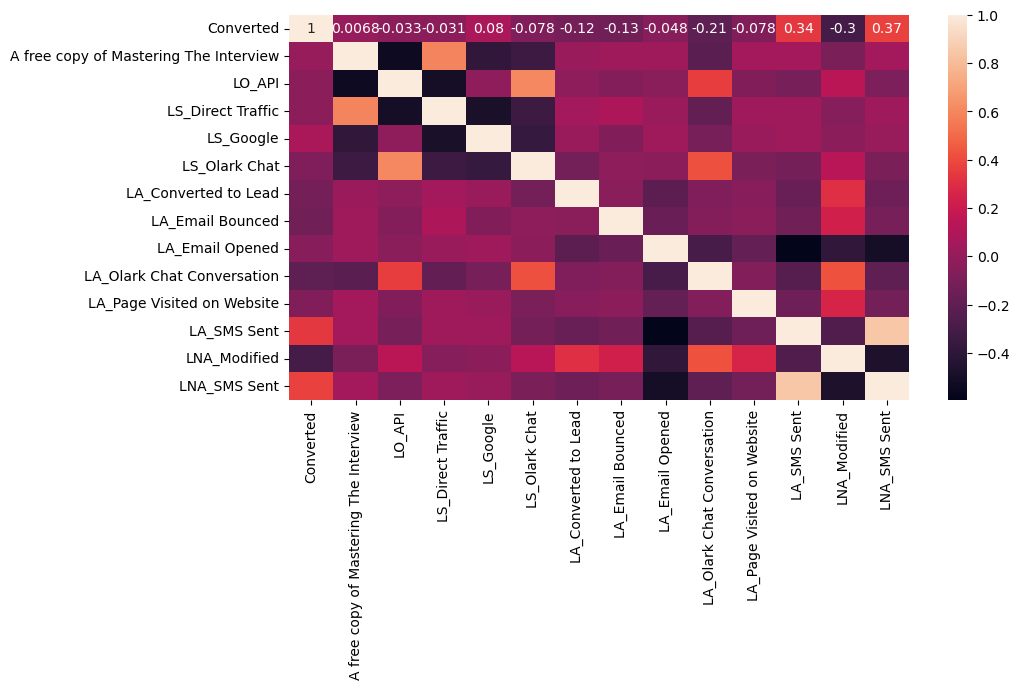

In [69]:
# Let's see the correlation matrix 
plt.figure(figsize = (10,5))        # Size of the figure
sns.heatmap(working_df.corr(),annot = True)
plt.show()

No significant observation, hence no changes

## Model Building

In [70]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5159
Model:                            GLM   Df Residuals:                     5145
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2827.9
Date:                Tue, 17 Sep 2024   Deviance:                       5655.8
Time:                        18:48:01   Pearson chi2:                 5.17e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.1782
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.3718      0.329     -4.169      0.000      -2.017      -0.727
A free copy of Mastering The Interview     0.1141      0.096      1.185      0.236      -0.075       0.303
LO_API                                     0.2115      0.094      2.250      0.024       0.027       0.396
LS_Direct Traffic                         -0.1681      0.110     -1.531      0.126      -0.383       0.047
LS_Google                                  0.2251      0.108      2.082      0.037       0.013       0.437
LS_Olark Chat                             -0.1134      0.133     -0.855      0.393      -0.374       0.147
LA_Converted to Lead                      -0.3582      0.327     -1.096      0.273      -0.999       0.282
LA_Email Bounced                          -2.3105      0.581     -3.980      0.000      -3.448      -1.173
LA_Email Opened                            0.4769      0.306      1.560      0.119      -0.122       1.076
LA_Olark Chat Conversation                -1.2434      0.333     -3.734      0.000      -1.896      -0.591
LA_Page Visited on Website                -0.1725      0.334     -0.516      0.606      -0.828       0.483
LA_SMS Sent                                0.4122      0.308      1.338      0.181      -0.192       1.016
LNA_Modified                              -0.1220      0.125     -0.976      0.329      -0.367       0.123
LNA_SMS Sent                               1.4832      0.184      8.061      0.000       1.123       1.844
==========================================================================================================
"""

In [71]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE

In [72]:
rfe = RFE(estimator=logreg, n_features_to_select=10) # n_features_to_select is the number of features you want to select
rfe = rfe.fit(X_train, y_train)

In [73]:
rfe.support_

array([False,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True])

In [74]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('A free copy of Mastering The Interview', False, 2),
 ('LO_API', True, 1),
 ('LS_Direct Traffic', True, 1),
 ('LS_Google', True, 1),
 ('LS_Olark Chat', False, 3),
 ('LA_Converted to Lead', True, 1),
 ('LA_Email Bounced', True, 1),
 ('LA_Email Opened', True, 1),
 ('LA_Olark Chat Conversation', True, 1),
 ('LA_Page Visited on Website', False, 4),
 ('LA_SMS Sent', True, 1),
 ('LNA_Modified', True, 1),
 ('LNA_SMS Sent', True, 1)]

In [75]:
col = X_train.columns[rfe.support_]

In [76]:
X_train.columns[~rfe.support_]

Index(['A free copy of Mastering The Interview', 'LS_Olark Chat',
       'LA_Page Visited on Website'],
      dtype='object')

Assessing the model with StatsModels


In [77]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5159
Model:                            GLM   Df Residuals:                     5148
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2829.4
Date:                Tue, 17 Sep 2024   Deviance:                       5658.7
Time:                        18:48:02   Pearson chi2:                 5.18e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.1777
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.4559      0.209     -6.971      0.000      -1.865      -1.047
LO_API                         0.1357      0.082      1.662      0.097      -0.024       0.296
LS_Direct Traffic             -0.0988      0.099     -0.993      0.320      -0.294       0.096
LS_Google                      0.2438      0.084      2.918      0.004       0.080       0.408
LA_Converted to Lead          -0.2300      0.220     -1.044      0.297      -0.662       0.202
LA_Email Bounced              -2.2055      0.528     -4.176      0.000      -3.241      -1.170
LA_Email Opened                0.5823      0.189      3.082      0.002       0.212       0.953
LA_Olark Chat Conversation    -1.1610      0.229     -5.072      0.000      -1.610      -0.712
LA_SMS Sent                    0.5306      0.193      2.747      0.006       0.152       0.909
LNA_Modified                  -0.1290      0.125     -1.033      0.301      -0.374       0.116
LNA_SMS Sent                   1.4728      0.184      8.013      0.000       1.113       1.833
==============================================================================================
"""

In [78]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3768    0.068488
1691    0.239923
4789    0.610339
8218    0.294498
3507    0.347548
3692    0.274397
5069    0.610339
8449    0.294498
5920    0.688117
4333    0.688117
dtype: float64

In [79]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.06848847, 0.23992291, 0.61033864, 0.29449829, 0.34754784,
       0.27439656, 0.61033864, 0.29449829, 0.68811677, 0.68811677])

Creating a dataframe with the actual lead flag and the predicted probabilities

In [80]:
y_train_pred_final = pd.DataFrame({'Lead':y_train.values, 'Lead_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

Lead  Lead_Prob  Prospect ID
0     0   0.068488         3768
1     0   0.239923         1691
2     1   0.610339         4789
3     1   0.294498         8218
4     0   0.347548         3507

In [81]:
y_train_pred_final['predicted'] = y_train_pred_final.Lead_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Lead  Lead_Prob  Prospect ID  predicted
0     0   0.068488         3768          0
1     0   0.239923         1691          0
2     1   0.610339         4789          1
3     1   0.294498         8218          0
4     0   0.347548         3507          0

In [82]:
from sklearn import metrics

In [83]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Lead, y_train_pred_final.predicted )
print(confusion)

[[2903  460]
 [ 923  873]]


In [84]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Lead, y_train_pred_final.predicted))

0.7319247916262842


In [85]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [86]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
7                 LA_SMS Sent  8.15
9                LNA_SMS Sent  7.49
8                LNA_Modified  3.84
5             LA_Email Opened  2.84
0                      LO_API  2.63
1           LS_Direct Traffic  2.62
6  LA_Olark Chat Conversation  2.24
2                   LS_Google  2.14
3        LA_Converted to Lead  1.61
4            LA_Email Bounced  1.33

There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. 
The variable 'LA_SMS_Sent' has the highest VIF. So let's start by dropping that.

In [87]:
col = col.drop('LA_SMS Sent', 1)
col

Index(['LO_API', 'LS_Direct Traffic', 'LS_Google', 'LA_Converted to Lead',
       'LA_Email Bounced', 'LA_Email Opened', 'LA_Olark Chat Conversation',
       'LNA_Modified', 'LNA_SMS Sent'],
      dtype='object')

In [88]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5159
Model:                            GLM   Df Residuals:                     5149
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2833.2
Date:                Tue, 17 Sep 2024   Deviance:                       5666.4
Time:                        18:48:02   Pearson chi2:                 5.18e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.1765
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.1538      0.173     -6.674      0.000      -1.493      -0.815
LO_API                         0.1390      0.082      1.703      0.088      -0.021       0.299
LS_Direct Traffic             -0.0990      0.099     -0.997      0.319      -0.294       0.096
LS_Google                      0.2423      0.083      2.903      0.004       0.079       0.406
LA_Converted to Lead          -0.5324      0.187     -2.853      0.004      -0.898      -0.167
LA_Email Bounced              -2.5078      0.515     -4.870      0.000      -3.517      -1.499
LA_Email Opened                0.2795      0.148      1.887      0.059      -0.011       0.570
LA_Olark Chat Conversation    -1.4654      0.196     -7.467      0.000      -1.850      -1.081
LNA_Modified                  -0.1293      0.125     -1.036      0.300      -0.374       0.115
LNA_SMS Sent                   1.7008      0.167     10.192      0.000       1.374       2.028
==============================================================================================
"""

In [89]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3768    0.068529
1691    0.200674
4789    0.610162
8218    0.294376
3507    0.347077
3692    0.274228
5069    0.610162
8449    0.294376
5920    0.687693
4333    0.687693
dtype: float64

In [90]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.06852946, 0.20067436, 0.61016175, 0.29437579, 0.3470773 ,
       0.27422818, 0.61016175, 0.29437579, 0.68769305, 0.68769305])

In [91]:
y_train_pred_final['Lead_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Lead_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Lead  Lead_Prob  Prospect ID  predicted
0     0   0.068529         3768          0
1     0   0.200674         1691          0
2     1   0.610162         4789          1
3     1   0.294376         8218          0
4     0   0.347077         3507          0

In [92]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Lead, y_train_pred_final.predicted))

0.7319247916262842


In [93]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
7                LNA_Modified  2.99
5             LA_Email Opened  2.61
0                      LO_API  2.58
1           LS_Direct Traffic  2.53
8                LNA_SMS Sent  2.14
2                   LS_Google  2.07
6  LA_Olark Chat Conversation  1.84
3        LA_Converted to Lead  1.37
4            LA_Email Bounced  1.20

All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [94]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Lead, y_train_pred_final.predicted )
confusion

array([[2903,  460],
       [ 923,  873]], dtype=int64)

In [95]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Lead, y_train_pred_final.predicted)

0.7319247916262842

## Metrics beyond simply accuracy

In [96]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [97]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.4860801781737194

In [98]:
# Let us calculate specificity
TN / float(TN+FP)

0.8632173654475171

In [99]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1367826345524829


In [100]:
# positive predictive value 
print (TP / float(TP+FP))

0.654913728432108


In [101]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7587558808154731


## Plotting the ROC Curve

An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [102]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [103]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Lead, y_train_pred_final.Lead_Prob, drop_intermediate = False )

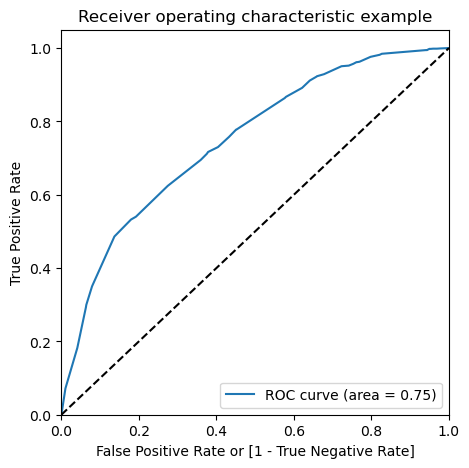

In [104]:
draw_roc(y_train_pred_final.Lead, y_train_pred_final.Lead_Prob)

## Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [105]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Lead_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Lead  Lead_Prob  Prospect ID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0     0   0.068529         3768          0    1    0    0    0    0    0    0   
1     0   0.200674         1691          0    1    1    1    0    0    0    0   
2     1   0.610162         4789          1    1    1    1    1    1    1    1   
3     1   0.294376         8218          0    1    1    1    0    0    0    0   
4     0   0.347077         3507          0    1    1    1    1    0    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0

In [106]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Lead, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.348129  1.000000  0.000000
0.1   0.1  0.471603  0.976058  0.202200
0.2   0.2  0.511533  0.950445  0.277134
0.3   0.3  0.654584  0.716592  0.621469
0.4   0.4  0.731925  0.486080  0.863217
0.5   0.5  0.731925  0.486080  0.863217
0.6   0.6  0.731925  0.486080  0.863217
0.7   0.7  0.670091  0.071826  0.989593
0.8   0.8  0.651871  0.000000  1.000000
0.9   0.9  0.651871  0.000000  1.000000


In [107]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [108]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Lead_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

Lead  Lead_Prob  Prospect ID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0     0   0.068529         3768          0    1    0    0    0    0    0    0   
1     0   0.200674         1691          0    1    1    1    0    0    0    0   
2     1   0.610162         4789          1    1    1    1    1    1    1    1   
3     1   0.294376         8218          0    1    1    1    0    0    0    0   
4     0   0.347077         3507          0    1    1    1    1    0    0    0   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                1  
3    0    0    0                0  
4    0    0    0                1

In [109]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Lead, y_train_pred_final.final_predicted)

0.6545842217484008

In [110]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Lead, y_train_pred_final.final_predicted )
confusion2

array([[2090, 1273],
       [ 509, 1287]], dtype=int64)

In [111]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [112]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7165924276169265

In [113]:
# Let us calculate specificity
TN / float(TN+FP)

0.6214689265536724

In [114]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.3785310734463277


In [115]:
# Positive predictive value 
print (TP / float(TP+FP))

0.502734375


In [116]:
# Negative predictive value
print (TN / float(TN+ FN))

0.804155444401693


## Precision and Recall

#Looking at the confusion matrix again

In [117]:
confusion = metrics.confusion_matrix(y_train_pred_final.Lead, y_train_pred_final.predicted )
confusion

array([[2903,  460],
       [ 923,  873]], dtype=int64)

##### Precision
TP / TP + FP

In [118]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.654913728432108

##### Recall
TP / TP + FN

In [119]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.4860801781737194

In [120]:
from sklearn.metrics import precision_score, recall_score

In [121]:
?precision_score

Signature:
precision_score(
    y_true,
    y_pred,
    *,
    labels=None,
    pos_label=1,
    average='binary',
    sample_weight=None,
    zero_division='warn',
)
Docstring:
Compute the precision.

The precision is the ratio ``tp / (tp + fp)`` where ``tp`` is the number of
true positives and ``fp`` the number of false positives. The precision is
intuitively the ability of the classifier not to label as positive a sample
that is negative.

The best value is 1 and the worst value is 0.

Read more in the :ref:`User Guide <precision_recall_f_measure_metrics>`.

Parameters
----------
y_true : 1d array-like, or label indicator array / sparse matrix
    Ground truth (correct) target values.

y_pred : 1d array-like, or label indicator array / sparse matrix
    Estimated targets as returned by a classifier.

labels : array-like, default=None
    The set of labels to include when ``average != 'binary'``, and their
    order if ``average is None``. Labels present in the data can be
    exclud

In [122]:
precision_score(y_train_pred_final.Lead, y_train_pred_final.predicted)

0.654913728432108

In [123]:
recall_score(y_train_pred_final.Lead, y_train_pred_final.predicted)

0.4860801781737194

### Precision and recall tradeoff

In [124]:
from sklearn.metrics import precision_recall_curve

In [125]:
y_train_pred_final.Lead, y_train_pred_final.predicted

(0       0
 1       0
 2       1
 3       1
 4       0
        ..
 5154    0
 5155    0
 5156    1
 5157    0
 5158    0
 Name: Lead, Length: 5159, dtype: int64,
 0       0
 1       0
 2       1
 3       0
 4       0
        ..
 5154    0
 5155    0
 5156    1
 5157    0
 5158    1
 Name: predicted, Length: 5159, dtype: int64)

In [126]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Lead, y_train_pred_final.Lead_Prob)

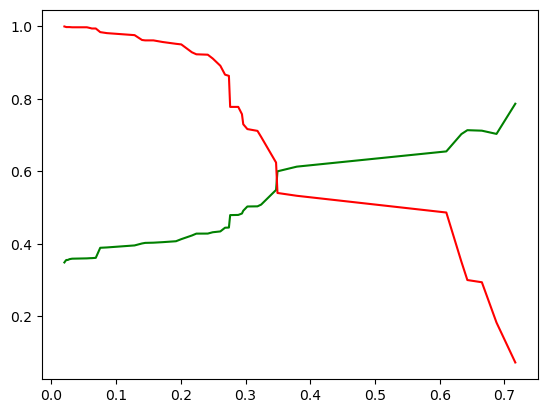

In [127]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [128]:
X_test = X_test[col]
X_test.head()

LO_API  LS_Direct Traffic  LS_Google  LA_Converted to Lead  \
339        1                  0          1                     0   
7095       0                  1          0                     0   
1150       1                  0          1                     0   
6284       1                  0          0                     0   
1728       0                  0          0                     0   

      LA_Email Bounced  LA_Email Opened  LA_Olark Chat Conversation  \
339                  0                1                           0   
7095                 0                0                           0   
1150                 0                0                           0   
6284                 0                0                           0   
1728                 0                0                           0   

      LNA_Modified  LNA_SMS Sent  
339              1             0  
7095             0             1  
1150             0             1  
6284             1             0  
1728             0             1

In [129]:
X_test_sm = sm.add_constant(X_test)

In [130]:
y_test_pred = res.predict(X_test_sm)

In [131]:
y_test_pred[:10]

339     0.349272
7095    0.610162
1150    0.716732
6284    0.241572
1728    0.633449
8483    0.687693
3667    0.128480
3263    0.192453
7717    0.324039
2225    0.274228
dtype: float64

In [132]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [133]:
# Let's see the head
y_pred_1.head()

0
339   0.349272
7095  0.610162
1150  0.716732
6284  0.241572
1728  0.633449

In [134]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [135]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [136]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [137]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [138]:
y_pred_final.head()

Converted  Prospect ID         0
0          0          339  0.349272
1          1         7095  0.610162
2          1         1150  0.716732
3          0         6284  0.241572
4          1         1728  0.633449

In [139]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Lead_Prob'})

In [140]:
# Let's see the head of y_pred_final
y_pred_final.head()

Converted  Prospect ID  Lead_Prob
0          0          339   0.349272
1          1         7095   0.610162
2          1         1150   0.716732
3          0         6284   0.241572
4          1         1728   0.633449

In [141]:
y_pred_final['final_predicted'] = y_pred_final.Lead_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [142]:
y_pred_final.head()

Converted  Prospect ID  Lead_Prob  final_predicted
0          0          339   0.349272                0
1          1         7095   0.610162                1
2          1         1150   0.716732                1
3          0         6284   0.241572                0
4          1         1728   0.633449                1

In [143]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7002712477396021

In [144]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1126,  252],
       [ 411,  423]], dtype=int64)

In [145]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [146]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5071942446043165

In [147]:
# Let us calculate specificity
TN / float(TN+FP)

0.8171262699564587